In [22]:
import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt

In [24]:
filePath = '../Resources/Montgomery_Crash_Data.csv'
df = pd.read_csv(filePath)

In [25]:
df.columns

Index(['Unnamed: 0', 'index', 'Report Number', 'Crash Date/Time', 'Weather',
       'Surface Condition', 'Injury Severity', 'Vehicle ID', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'geometry'],
      dtype='object')

In [26]:
df_dateTimeSeverity = df[['Crash Date/Time', 'Injury Severity']]
df_dateTimeSeverity.head()

,Crash Date/Time,Injury Severity
0,2021-04-04 12:00:00,NO APPARENT INJURY
1,2023-12-04 21:37:00,SUSPECTED MINOR INJURY
2,2024-07-17 21:27:00,SUSPECTED MINOR INJURY
3,2016-06-21 09:49:00,NO APPARENT INJURY
4,2016-12-05 06:55:00,SUSPECTED MINOR INJURY


In [27]:
df_dateTimeSeverity.set_index('Crash Date/Time', inplace=True)
df_dateTimeSeverity.index = pd.to_datetime(df_dateTimeSeverity.index)
display(df_dateTimeSeverity.head())
display(df_dateTimeSeverity.tail())

,Injury Severity
Crash Date/Time,
2021-04-04 12:00:00,NO APPARENT INJURY
2023-12-04 21:37:00,SUSPECTED MINOR INJURY
2024-07-17 21:27:00,SUSPECTED MINOR INJURY
2016-06-21 09:49:00,NO APPARENT INJURY
2016-12-05 06:55:00,SUSPECTED MINOR INJURY


,Injury Severity
Crash Date/Time,
2019-12-09 07:33:00,SUSPECTED MINOR INJURY
2023-09-19 08:43:00,NO APPARENT INJURY
2016-10-29 14:05:00,NO APPARENT INJURY
2021-09-24 07:43:00,NO APPARENT INJURY
2020-02-09 13:17:00,NO APPARENT INJURY


In [28]:
unique_severity = df_dateTimeSeverity['Injury Severity'].unique()
print(f"The unique_severity colums are as follows {unique_severity}")

The unique_severity colums are as follows ['NO APPARENT INJURY' 'SUSPECTED MINOR INJURY' 'FATAL INJURY'
 'SUSPECTED SERIOUS INJURY']


In [29]:
severity_count = df_dateTimeSeverity['Injury Severity'].value_counts()
display(severity_count)

Injury Severity
NO APPARENT INJURY          86159
SUSPECTED MINOR INJURY      16779
SUSPECTED SERIOUS INJURY      936
FATAL INJURY                  128
Name: count, dtype: int64

In [30]:
date_count = df_dateTimeSeverity.shape[0]
print(f"The total number of accidents is {date_count}")

The total number of accidents is 104002


In [31]:
df_dateTimeSeverity = df_dateTimeSeverity.sort_values(by='Crash Date/Time')
display(df_dateTimeSeverity.head())
display(df_dateTimeSeverity.tail())

,Injury Severity
Crash Date/Time,
2015-01-01 00:30:00,NO APPARENT INJURY
2015-01-01 01:10:00,NO APPARENT INJURY
2015-01-01 01:14:00,NO APPARENT INJURY
2015-01-01 01:26:00,NO APPARENT INJURY
2015-01-01 02:00:00,NO APPARENT INJURY


,Injury Severity
Crash Date/Time,
2024-09-25 16:33:00,NO APPARENT INJURY
2024-09-25 16:45:00,NO APPARENT INJURY
2024-09-25 17:32:00,NO APPARENT INJURY
2024-09-25 17:53:00,NO APPARENT INJURY
2024-09-25 18:16:00,NO APPARENT INJURY


In [32]:
df_dateTimeSeverity.dtypes

Injury Severity    object
dtype: object

In [33]:
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])
df_dateTimeSeverity.dtypes

Injury Severity    object
dtype: object

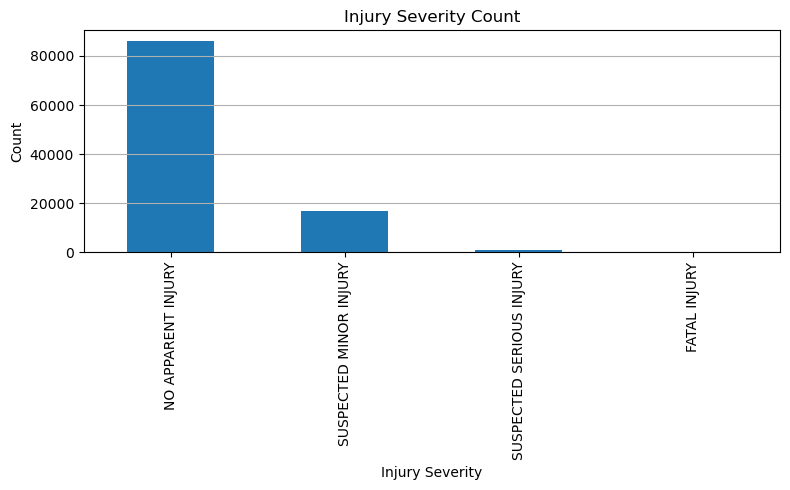

In [34]:
plt.figure(figsize=(8, 5))
df_dateTimeSeverity['Injury Severity'].value_counts().plot(kind='bar')

plt.title('Injury Severity Count')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


In [61]:
df_no_apparent_injury = df_dateTimeSeverity[df_dateTimeSeverity['Injury Severity'] == 'NO APPARENT INJURY']
df_suspected_minor_injury = df_dateTimeSeverity[df_dateTimeSeverity['Injury Severity'] == 'SUSPECTED MINOR INJURY']
df_suspected_serious_injury = df_dateTimeSeverity[df_dateTimeSeverity['Injury Severity'] == 'SUSPECTED SERIOUS INJURY']
df_fatal_injury = df_dateTimeSeverity[df_dateTimeSeverity['Injury Severity'] == 'FATAL INJURY']

display(df_no_apparent_injury.head())
display(df_suspected_minor_injury.head())
display(df_suspected_serious_injury.head())
display(df_fatal_injury.head())

,Injury Severity
Crash Date/Time,
2015-01-01 00:30:00,NO APPARENT INJURY
2015-01-01 01:10:00,NO APPARENT INJURY
2015-01-01 01:14:00,NO APPARENT INJURY
2015-01-01 01:26:00,NO APPARENT INJURY
2015-01-01 02:00:00,NO APPARENT INJURY


,Injury Severity
Crash Date/Time,
2015-01-01 02:33:00,SUSPECTED MINOR INJURY
2015-01-01 15:18:00,SUSPECTED MINOR INJURY
2015-01-01 20:54:00,SUSPECTED MINOR INJURY
2015-01-02 12:06:00,SUSPECTED MINOR INJURY
2015-01-02 12:24:00,SUSPECTED MINOR INJURY


,Injury Severity
Crash Date/Time,
2015-01-03 08:38:00,SUSPECTED SERIOUS INJURY
2015-01-05 11:33:00,SUSPECTED SERIOUS INJURY
2015-01-10 17:26:00,SUSPECTED SERIOUS INJURY
2015-01-15 11:31:00,SUSPECTED SERIOUS INJURY
2015-01-20 19:07:00,SUSPECTED SERIOUS INJURY


,Injury Severity
Crash Date/Time,
2015-04-06 16:57:00,FATAL INJURY
2015-05-31 15:05:00,FATAL INJURY
2015-06-23 20:26:00,FATAL INJURY
2015-07-05 05:07:00,FATAL INJURY
2015-07-28 21:24:00,FATAL INJURY


In [36]:
print(f"The total number of fatal injuries is {len(df_fatal_injury)}")

The total number of fatal injuries is 128


In [51]:
df_fatal_injury = df_fatal_injury.copy()
df_fatal_injury['Time of Day'] = df_fatal_injury.index.time
df_fatal_injury['HourOfAccident'] = pd.to_datetime(df_fatal_injury['Time of Day'], format='%H:%M:%S').dt.hour
display(df_fatal_injury['HourOfAccident'].value_counts())
display(df_fatal_injury.dtypes)

HourOfAccident
5     9
15    8
20    8
1     8
12    8
21    7
14    7
18    7
0     7
16    6
23    6
17    6
19    6
11    4
2     4
13    4
7     4
4     4
8     3
10    3
22    3
3     2
9     2
6     2
Name: count, dtype: int64

Injury Severity    object
Time of Day        object
HourOfAccident      int32
dtype: object

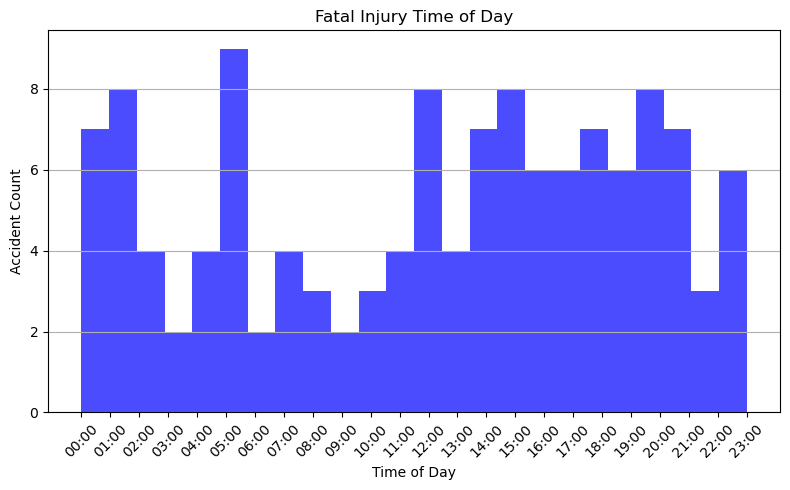

In [54]:
plt.figure(figsize=(8, 5))
plt.hist(df_fatal_injury['HourOfAccident'], bins=24, color='blue', alpha=0.7)
time_labels = [f'{str(i).zfill(2)}:00' for i in range(24)]
plt.title('Time of Day')
plt.grid(axis='y')
plt.title('Fatal Injury Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Accident Count')
plt.xticks(range(24), time_labels, rotation=45)
plt.tight_layout()
plt.show()

In [60]:
def graph_injury_severity(df):
    plt.figure(figsize=(8, 5))
    plt.hist(df['HourOfAccident'], bins=24, color='blue', alpha=0.7)
    time_labels = [f'{str(i).zfill(2)}:00' for i in range(24)]
    plt.title('Time of Day')
    plt.grid(axis='y')
    plt.title('Fatal Injury Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel('Accident Count')
    plt.xticks(range(24), time_labels, rotation=45)
    plt.tight_layout()
    plt.show()
    

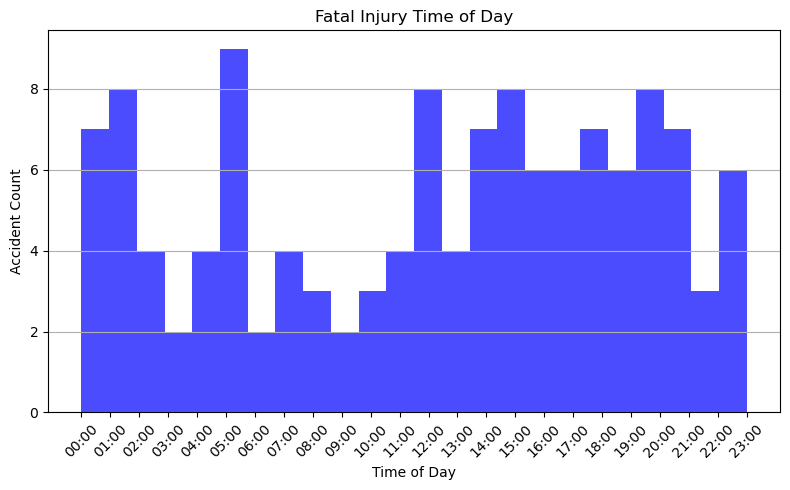

In [59]:
graph_injury_severity(df_fatal_injury)